In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/advertising-dataset/advertising.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
AD_df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

In [4]:
AD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
AD_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Data Cleaning**

In [6]:
AD_df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
AD_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**Exploratory Data Analysis (EDA)**

In [8]:
AD_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


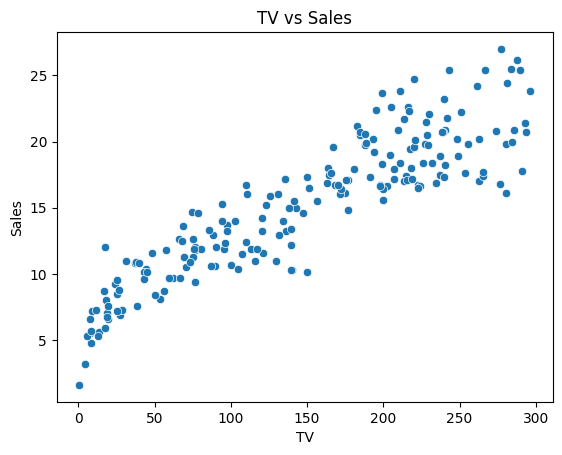

In [9]:
sns.scatterplot(x='TV', y='Sales', data=AD_df)
plt.title('TV vs Sales')
plt.show()


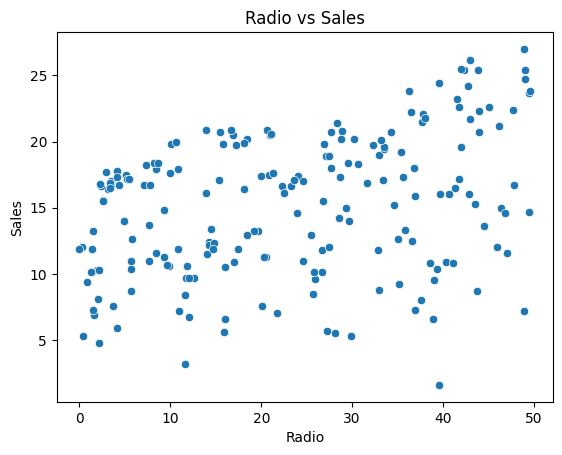

In [10]:
sns.scatterplot(x='Radio', y='Sales', data=AD_df)
plt.title('Radio vs Sales')
plt.show()

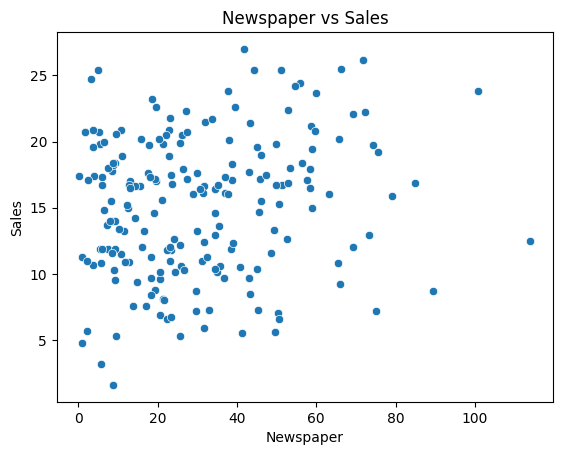

In [11]:
sns.scatterplot(x='Newspaper', y='Sales', data=AD_df)
plt.title('Newspaper vs Sales')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

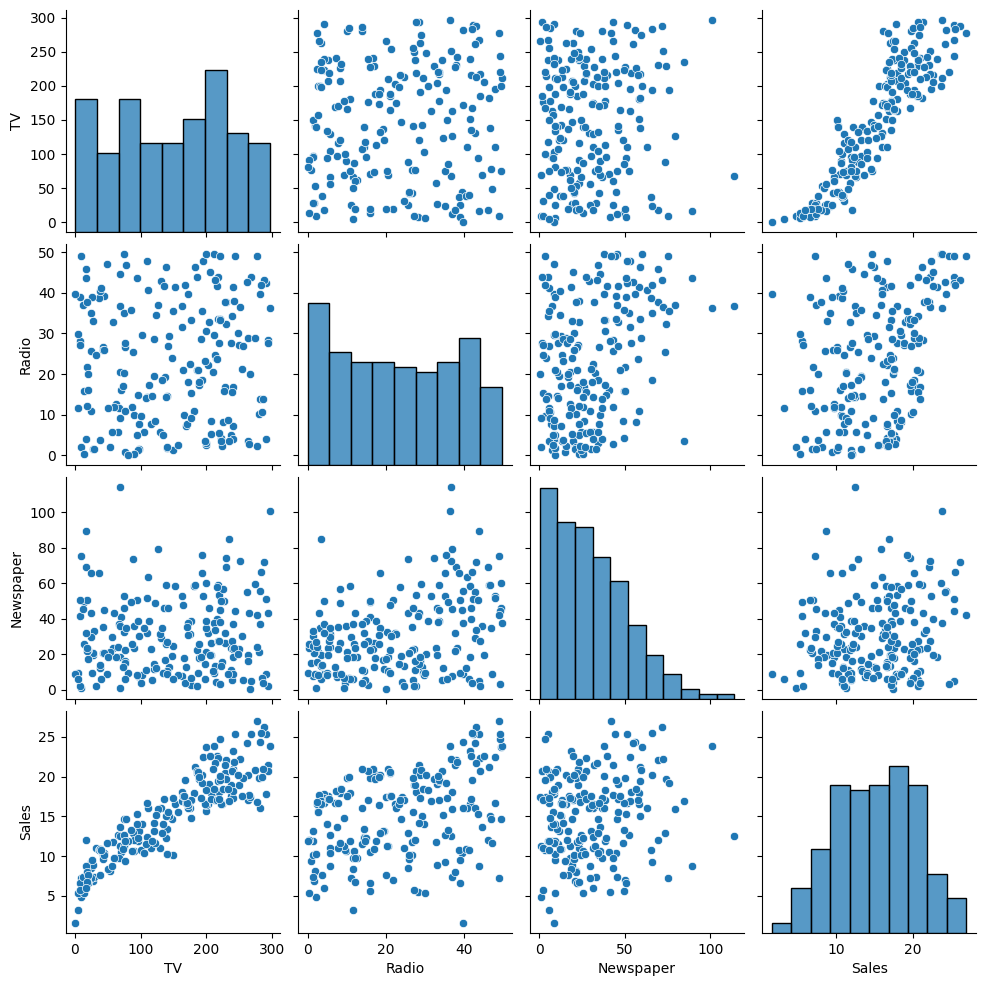

In [12]:
sns.pairplot(AD_df)
plt.show()

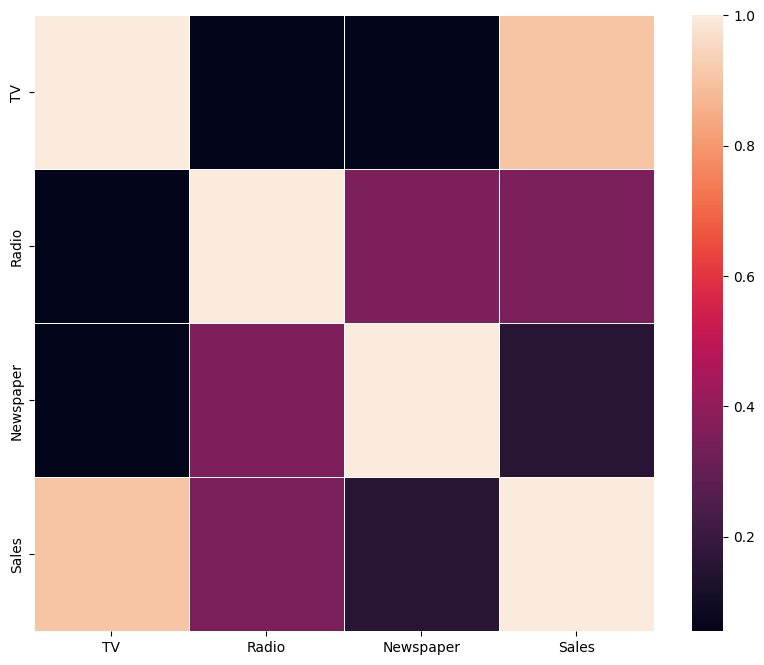

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(AD_df.corr(), linewidths=0.5)
plt.show()

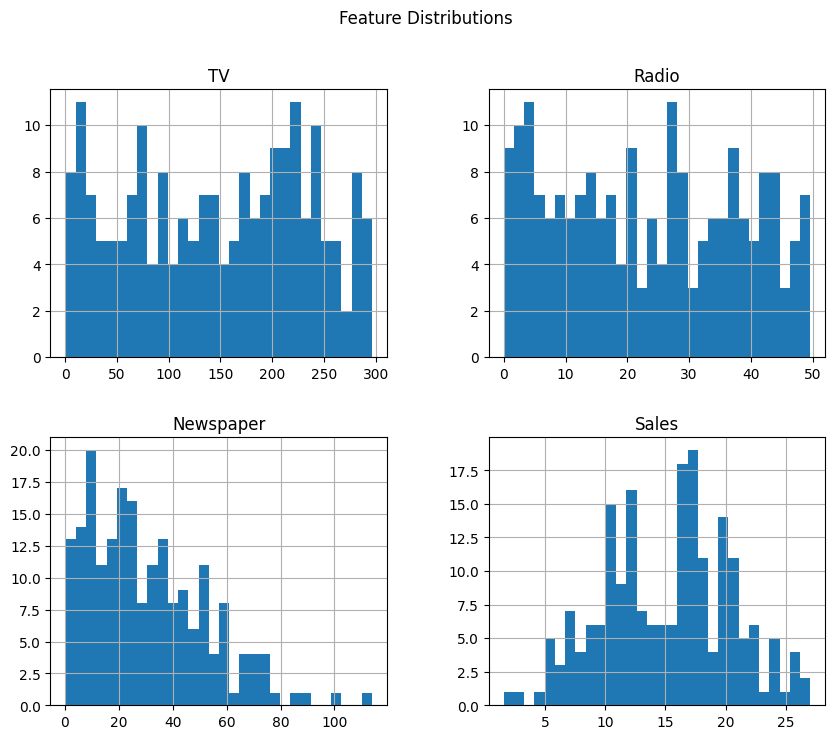

In [14]:
AD_df.hist(bins=30, figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()

**Modeling of dataset**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X = AD_df[['TV', 'Radio', 'Newspaper']]
y = AD_df['Sales']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.9077569102710896


In [23]:

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.9059011844150826


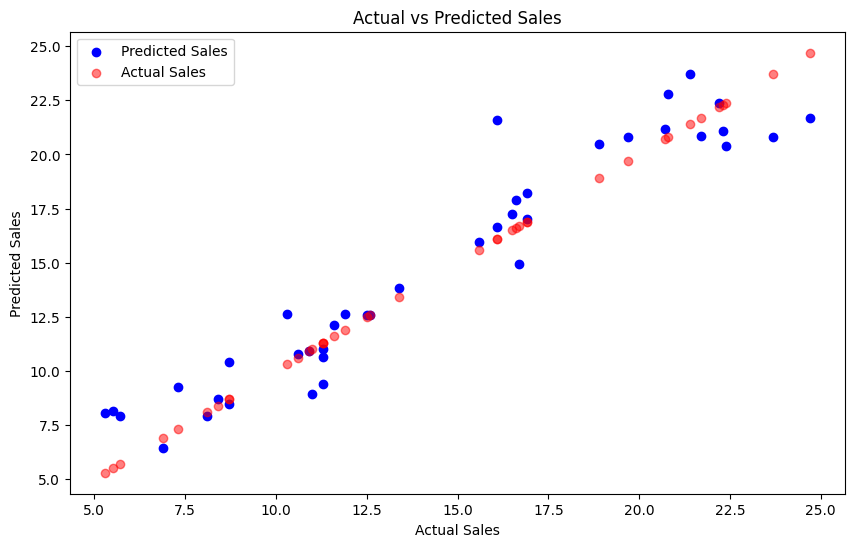

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.scatter(y_test, y_test, color='red', label='Actual Sales', alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

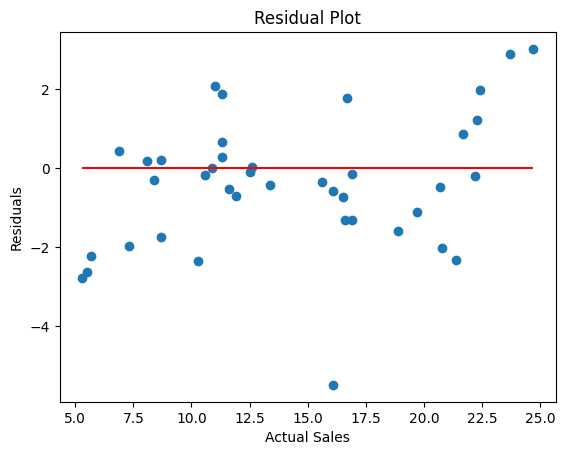

In [25]:
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


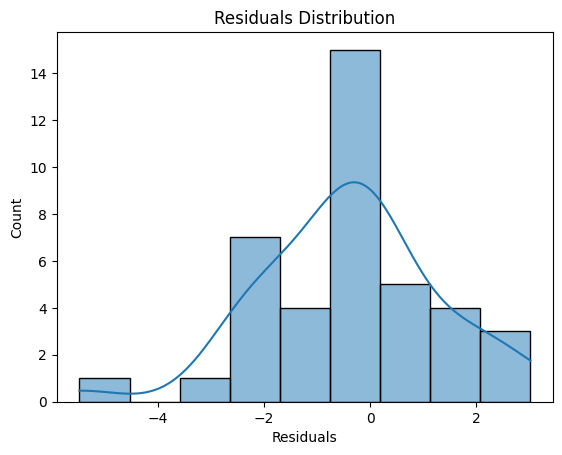

In [26]:
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [27]:
import scipy.stats as stats

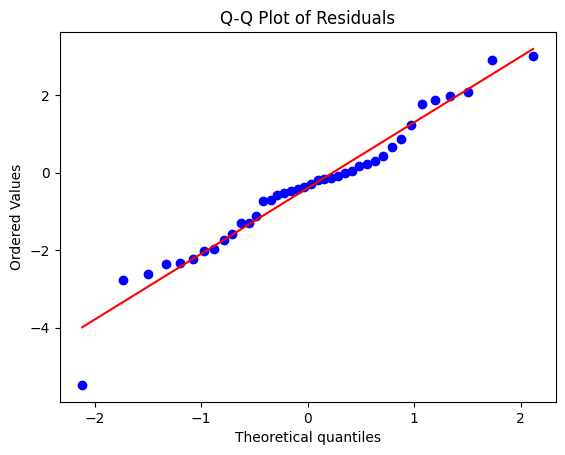

In [28]:
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [29]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
